# Exam Dataset

Working on generated dataset from the source below : 
Lets find which feature is determinant for school graduation , and find new dataset to solve the this " issue "

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

source: http://roycekimmons.com/tools/generated_data/exams

In [20]:
import glob
import pandas as pd

files = glob.glob('*.csv')
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
print(merged_df.head())


       


   gender race/ethnicity parental level of education         lunch  \
0    male        group C            some high school      standard   
1    male        group A                some college      standard   
2  female        group E           bachelor's degree      standard   
3  female        group D                 high school  free/reduced   
4    male        group D                 high school      standard   

  test preparation course  math score  reading score  writing score  
0                    none          60             53             50  
1                    none          83             76             74  
2                    none          58             65             65  
3                    none          54             52             56  
4                    none          71             61             61  


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       6000 non-null   object
 1   race/ethnicity               6000 non-null   object
 2   parental level of education  6000 non-null   object
 3   lunch                        6000 non-null   object
 4   test preparation course      6000 non-null   object
 5   math score                   6000 non-null   int64 
 6   reading score                6000 non-null   int64 
 7   writing score                6000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 375.1+ KB


In [22]:
merged_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [23]:
merged_df.describe()

,math score,reading score,writing score
count,6000.000000,6000.000000,6000.000000
mean,66.615333,69.623833,68.423667
std,15.280236,14.766742,15.532473
min,11.000000,18.000000,11.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,77.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [24]:
# Create Total Score column
merged_df['total score'] = merged_df['math score'] + merged_df['reading score'] + merged_df['writing score']

## 2 Explore the data

plot to discover

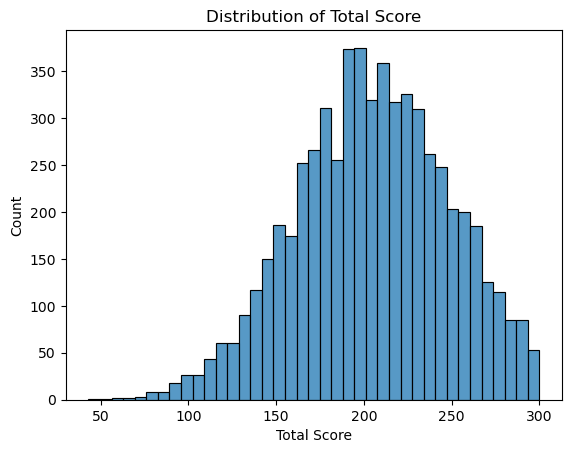

In [26]:

sns.histplot(merged_df['total score'])
plt.title('Distribution of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Count')
plt.show()

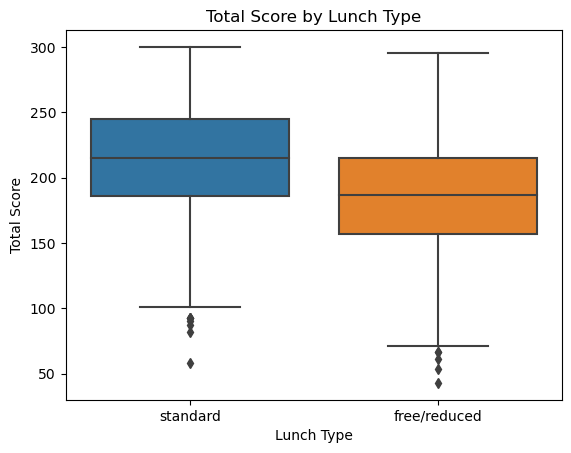

In [27]:

sns.boxplot(x='lunch', y='total score', data=merged_df)
plt.title('Total Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Total Score')
plt.show()

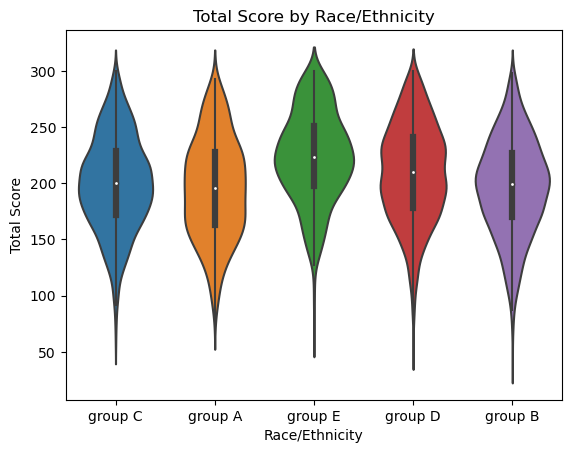

In [28]:
sns.violinplot(x='race/ethnicity', y='total score', data=merged_df)
plt.title('Total Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Score')
plt.show()

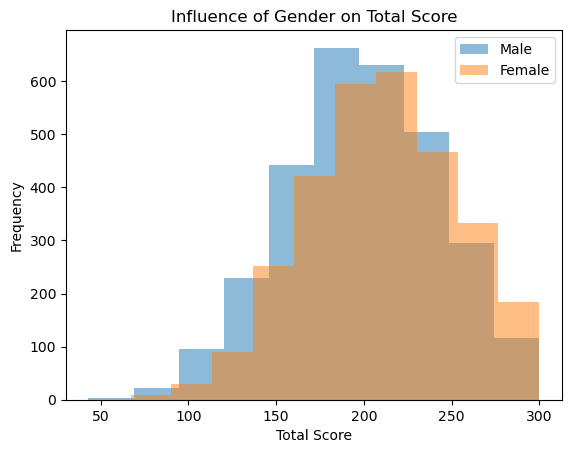

In [34]:
male_scores = merged_df.loc[merged_df['gender'] == 'male', 'total score']
female_scores = merged_df.loc[merged_df['gender'] == 'female', 'total score']


fig, ax = plt.subplots()
ax.hist(male_scores, alpha=0.5, label='Male')
ax.hist(female_scores, alpha=0.5, label='Female')
ax.set_title('Influence of Gender on Total Score')
ax.set_xlabel('Total Score')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

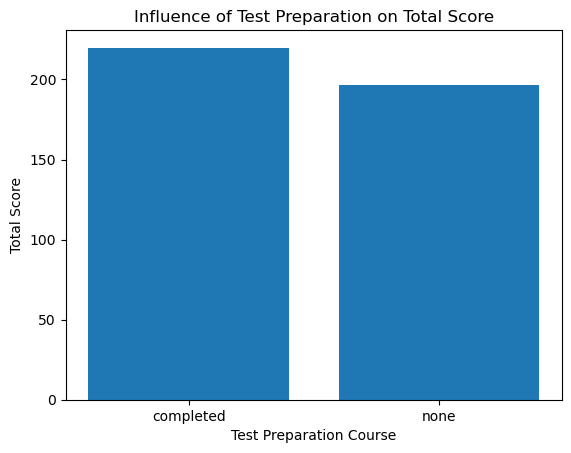

In [32]:
# Group the data by test preparation course and calculate the mean total score
test_prep_influence = merged_df.groupby('test preparation course')['total score'].mean()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(test_prep_influence.index, test_prep_influence.values)
ax.set_title('Influence of Test Preparation on Total Score')
ax.set_xlabel('Test Preparation Course')
ax.set_ylabel('Total Score')
plt.show()

C:\Users\yskon\AppData\Local\Temp\ipykernel_42180\464199946.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


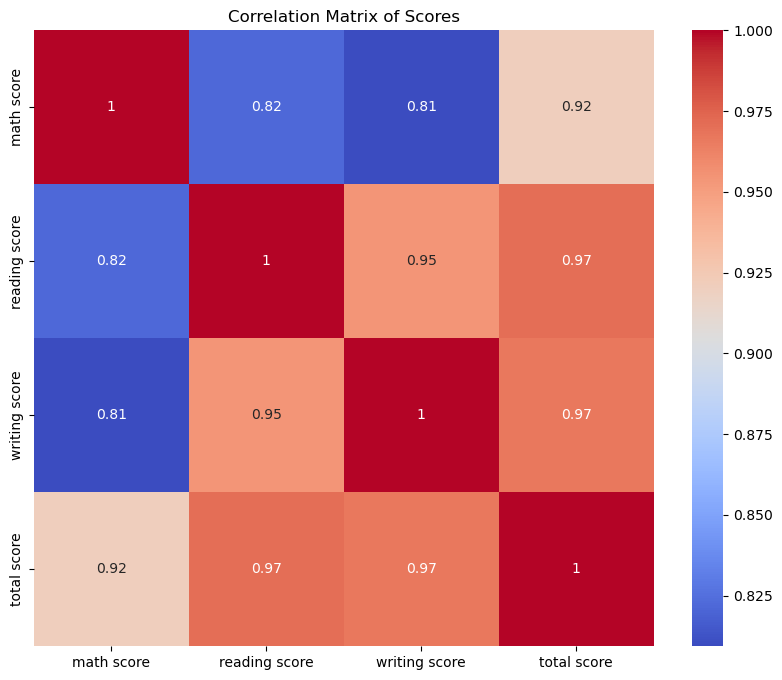

In [40]:

corr = merged_df.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Scores')
plt.show()

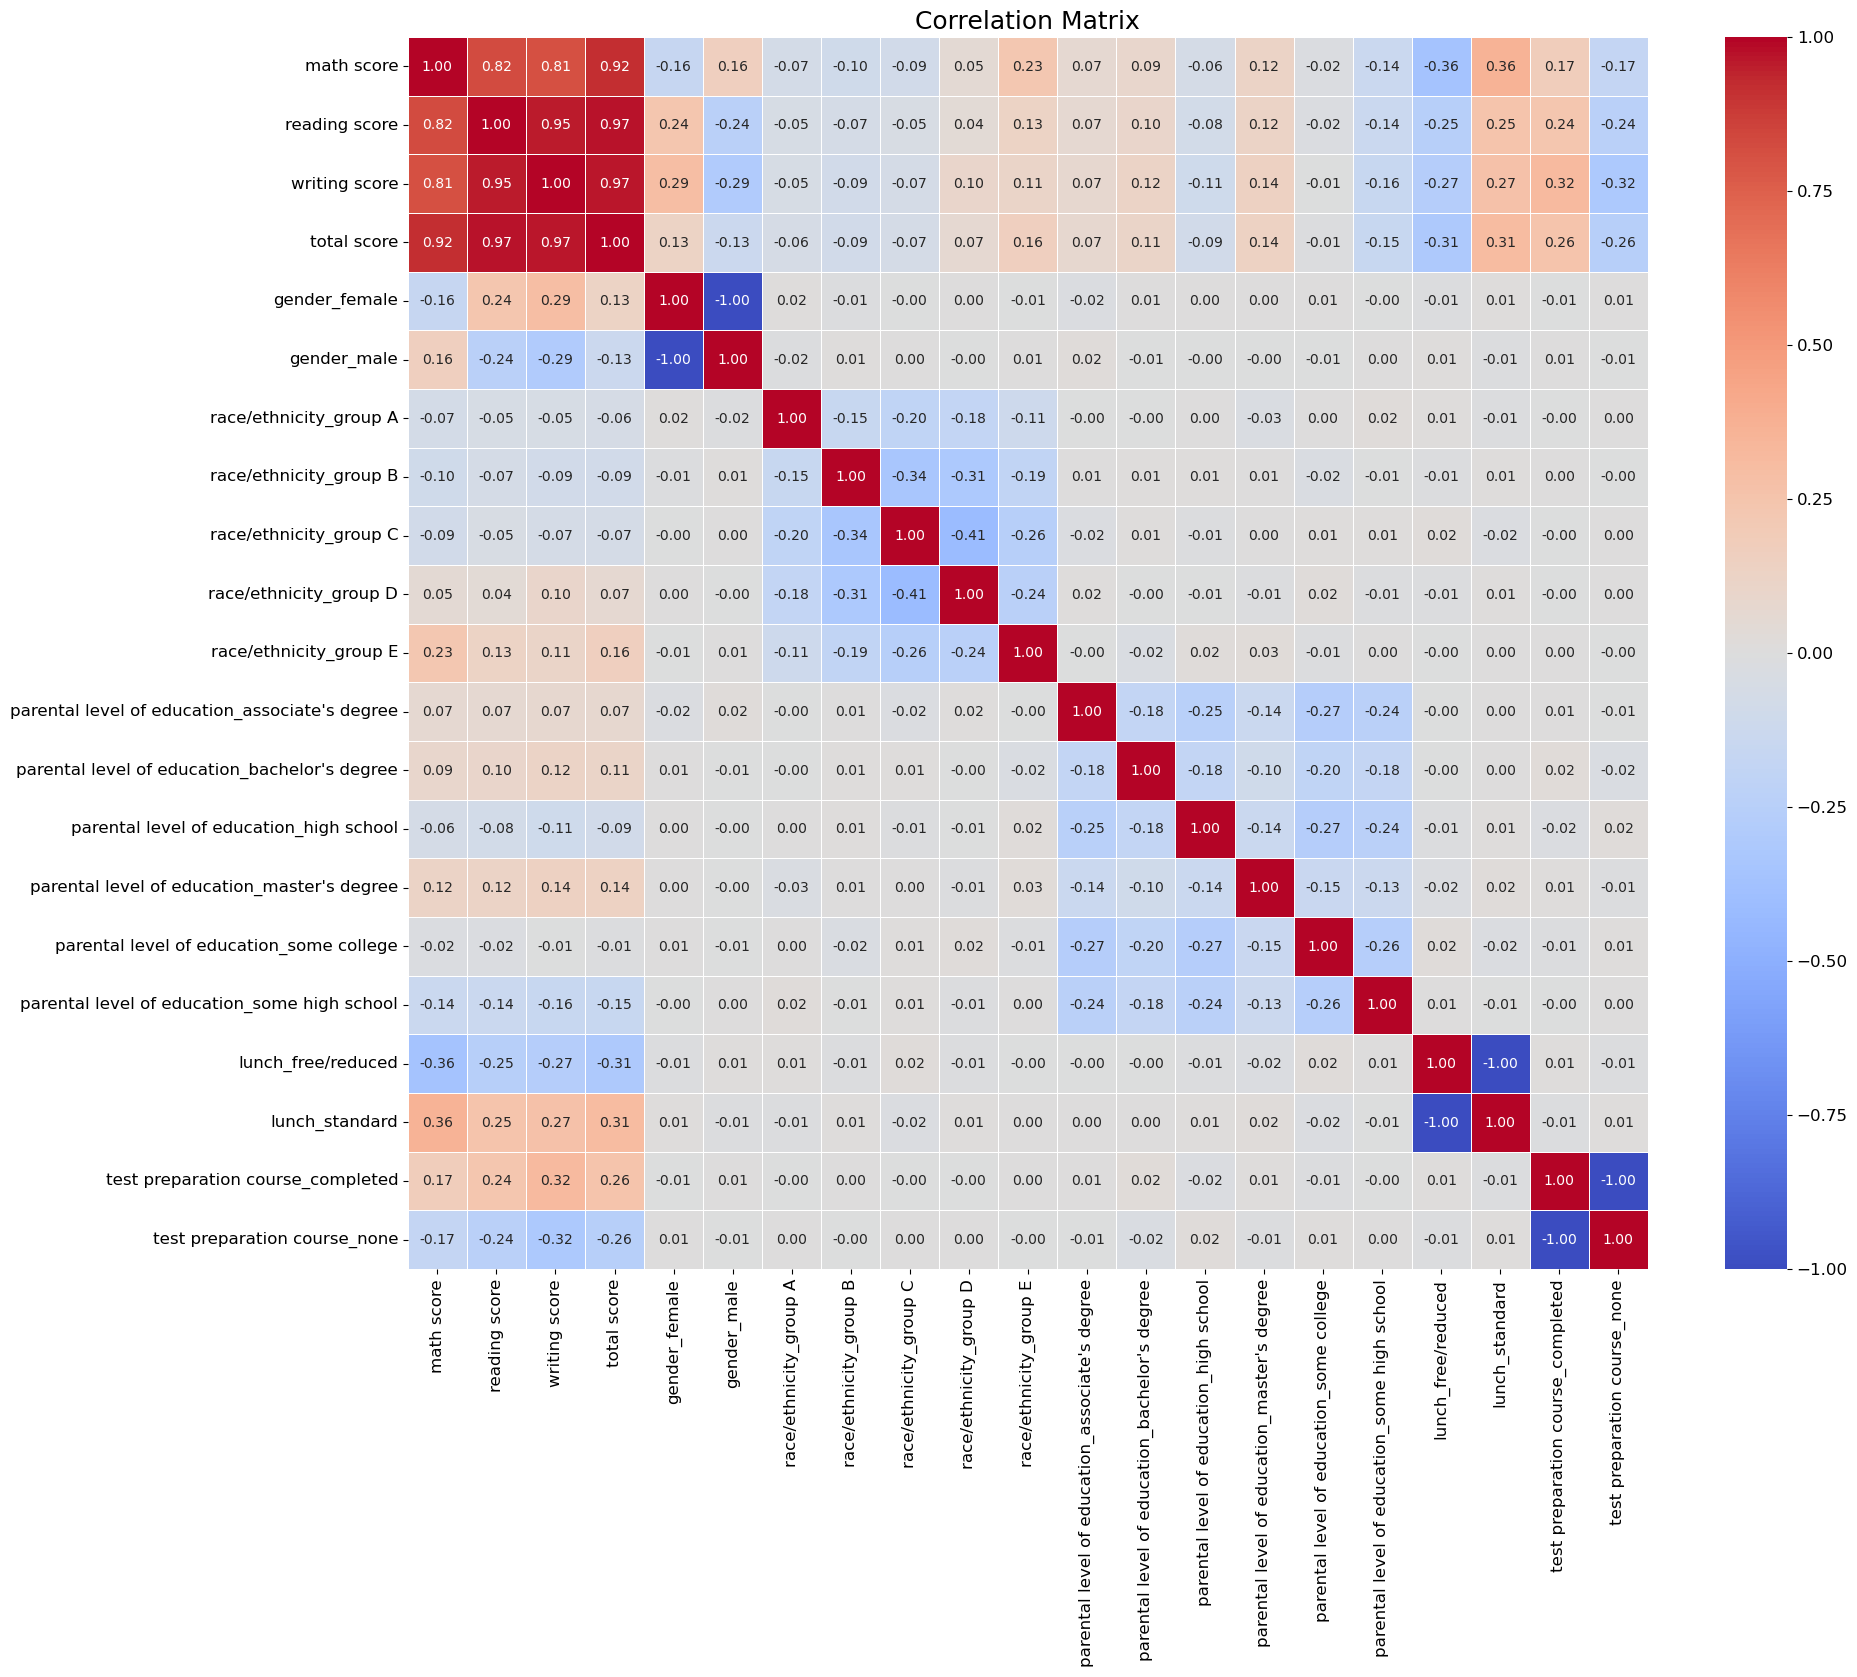

In [42]:
dum_df = pd.get_dummies(merged_df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

corr = dum_df .corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(20,16))


sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, ax=ax)


ax.tick_params(axis='both', which='major', labelsize=12)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)


ax.set_title('Correlation Matrix', fontsize=18)
plt.show()